# Exploratory Data Analysis of Epicurious Scrape in a JSON file

This is an idealized workflow for Aaron Chen in looking at data science problems. It likely isn't the best path, nor has he rigidly applied or stuck to this ideal, but he wishes that he worked this way more frequently.

## Purpose: This notebook will do some clustering and classification on the recipes missing cuisine labels. Make this fast and see what we can get. Then move on to:

1. Fixing Render
2. Creating login system to store searches and preferences
3. Fixing the filtering
4. Working on scrapers
5. Working on the database

### Author: Aaron Chen


---

### If needed, run shell commands here

In [1]:
# !python -m spacy download en_core_web_sm
# !python -c "import tkinter"

---

## External Resources

List out references or documentation that has helped you with this notebook

### Code
Regex Checker: https://regex101.com/

#### Scikit-learn
1. https://scikit-learn.org/stable/modules/decomposition.html#latent-dirichlet-allocation-lda
2. 

### Data

For this notebook, the data is stored in the repo base folder/data/raw

### Process

Are there steps or tutorials you are following? Those are things I try to list in Process

___

## Import necessary libraries

In [2]:
# from bokeh.plotting import figure, output_file, save, show
# from bokeh.io import output_notebook

from joblib import dump, load
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import FeatureAgglomeration, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split


---

## Define helper functions

My workflow is to try things with code cells, then when the code cells get messy and repetitive, to convert into helper functions that can be called.

When the helper functions are getting used a lot, it is usually better to convert them to scripts or classes that can be called/instantiated

### Import local script

I started grouping this in with importing libraries, but putting them at the bottom of the list

In [3]:
import project_path

import src.dataframe_preprocessor as dfpp
import src.nlp_processor as nlp_proc
import src.plotter as ILoveMyKeyboard
import src.transformers as skt

%matplotlib inline

/home/awchen/Repos/Projects/MeaLeon/.venv/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


---

## Define global variables 
### Remember to refactor these out, not ideal

In [4]:
# output_notebook()

---

## Running Commentary

1. 

### To Do

1. 

---

## Importing and viewing the data as a dataframe

In [5]:
raw_data_path = '../../data/recipes-en-201706/epicurious-recipes_m2.json'

joblib_basepath = '../../joblib/2022.08.23/'

cv_path = joblib_basepath + 'countvec.joblib'
tfidf_path = joblib_basepath + 'tfidf.joblib'
full_df_path = joblib_basepath + 'recipes_with_cv.joblib'
reduced_df_path = joblib_basepath + 'reduced_df.joblib'
rfc_path = joblib_basepath + 'rfc_clf.joblib'
X_path = joblib_basepath + 'X.joblib'
y_path = joblib_basepath + 'y.joblib'
truncSVD_path = joblib_basepath + 'truncSVD.joblib'
truncSVD_transformed_path = joblib_basepath + 'truncSVD_transformed.joblib'
svd_numpy_path = joblib_basepath + 'SVD_numpy.joblib'
to_plot_path = joblib_basepath + 'to_plot.joblib'
tsne_path = joblib_basepath + 'tsne.joblib'
tsne_vis_path = joblib_basepath + 'tsne_vis.joblib'
kmeans_path = joblib_basepath + 'kmeans.joblib'

We can probably start with recipes_with_cv and the rfc_clf below

Add in LGBM or XGBoost or KMeans/Silhouette 

In [6]:
cv = load(cv_path)
tfidf = load(tfidf_path)
recipes_with_cv = load(full_df_path)
recipes_with_cv.set_index('id', inplace=True, drop=True)
reduced_df = load(reduced_df_path)
reduced_df.set_index('id', inplace=True, drop=True)
rfc_clf = load(rfc_path)
X = load(X_path)
y = load(y_path)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=240, stratify=y
    )

Based on the user guide in sklearn, we should try Manhattan distance as a metric, but maybe also go with cosine distance

### Cosine distance first

In [8]:
cos_agglo = FeatureAgglomeration(n_clusters=50, affinity='cosine', linkage='average')
X_train_transformed = cos_agglo.fit_transform(X_train)

ValueError: Cosine affinity cannot be used when X contains zero vectors

### ok! let's try manhattan distance

In [9]:
manh_agglo = FeatureAgglomeration(n_clusters=5, affinity='manhattan', linkage='average')
X_train_transformed = manh_agglo.fit_transform(X_train)

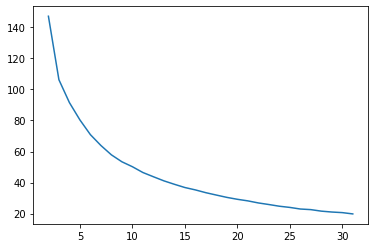

In [10]:
wcss = []
for i in range(2, 32):
    clustering = KMeans(n_clusters=i, random_state=200)
    clustering.fit(X_train_transformed)
    wcss.append(clustering.inertia_)

ks = list(range(2,32))

sns.lineplot(x = ks, y = wcss);

This looks like 5 clusters on 5 features

For n_clusters = 2 The average silhouette_score is : 0.02268846496110208
For n_clusters = 3 The average silhouette_score is : 0.018780503618823045
For n_clusters = 4 The average silhouette_score is : 0.018427639183618786
For n_clusters = 5 The average silhouette_score is : 0.020031354925909767
For n_clusters = 6 The average silhouette_score is : 0.02072943393873425
For n_clusters = 7 The average silhouette_score is : 0.01563793013734423
For n_clusters = 8 The average silhouette_score is : 0.015143478506260005
For n_clusters = 9 The average silhouette_score is : 0.016218219785395335
For n_clusters = 10 The average silhouette_score is : 0.016690625105989565
For n_clusters = 11 The average silhouette_score is : 0.01669035999100871
For n_clusters = 12 The average silhouette_score is : 0.018315801573681637
For n_clusters = 13 The average silhouette_score is : 0.01840991605102511
For n_clusters = 14 The average silhouette_score is : 0.020721747957542
For n_clusters = 15 The average silhouett

/tmp/ipykernel_7943/510207845.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 22 The average silhouette_score is : 0.022513375996264143
For n_clusters = 23 The average silhouette_score is : 0.024493007841133597
For n_clusters = 24 The average silhouette_score is : 0.022848834148322044
For n_clusters = 25 The average silhouette_score is : 0.02469233669392763
For n_clusters = 26 The average silhouette_score is : 0.025221834475194726
For n_clusters = 27 The average silhouette_score is : 0.023731993819381982
For n_clusters = 28 The average silhouette_score is : 0.02545816444079024
For n_clusters = 29 The average silhouette_score is : 0.024600678096130712
For n_clusters = 30 The average silhouette_score is : 0.025461695005681843
For n_clusters = 31 The average silhouette_score is : 0.02673921994999865
For n_clusters = 32 The average silhouette_score is : 0.026908375837575542


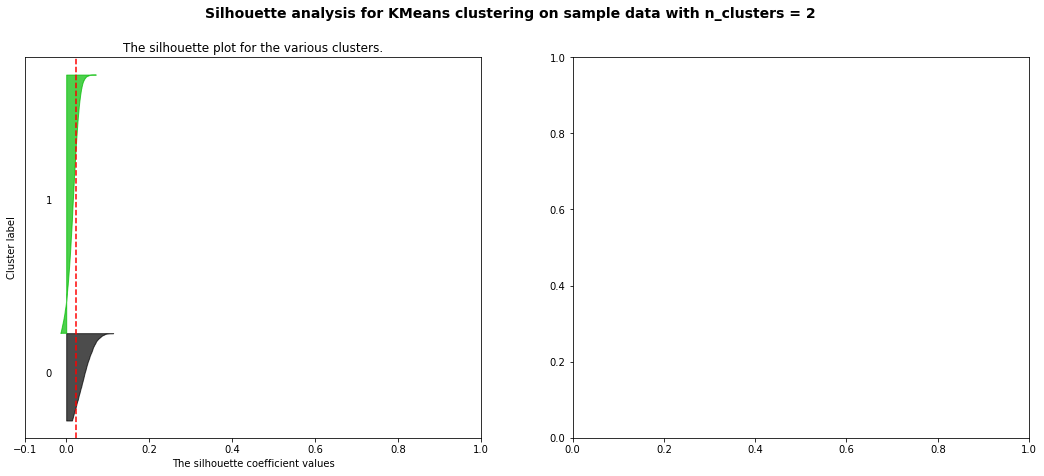

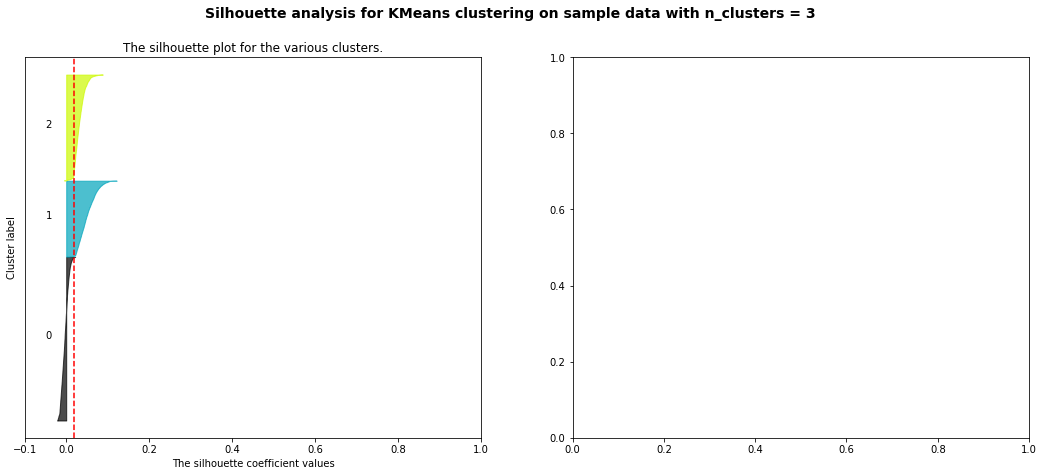

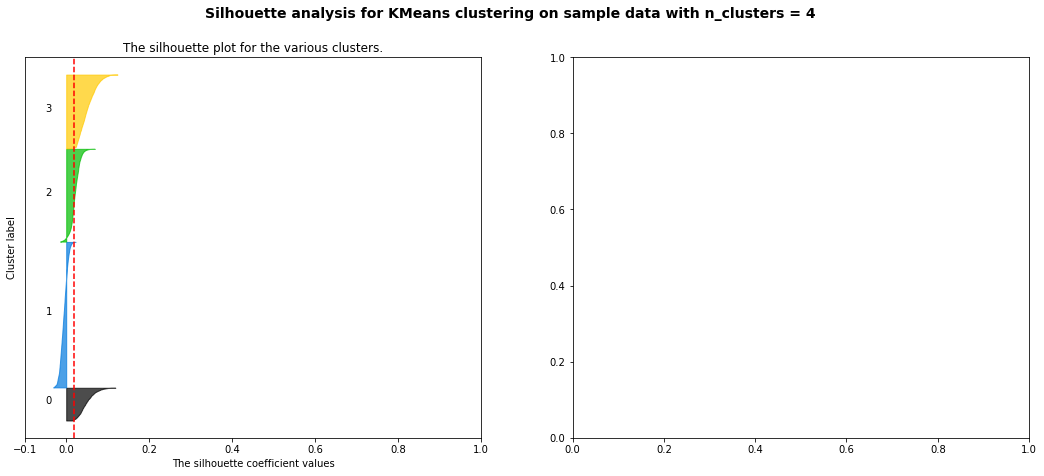

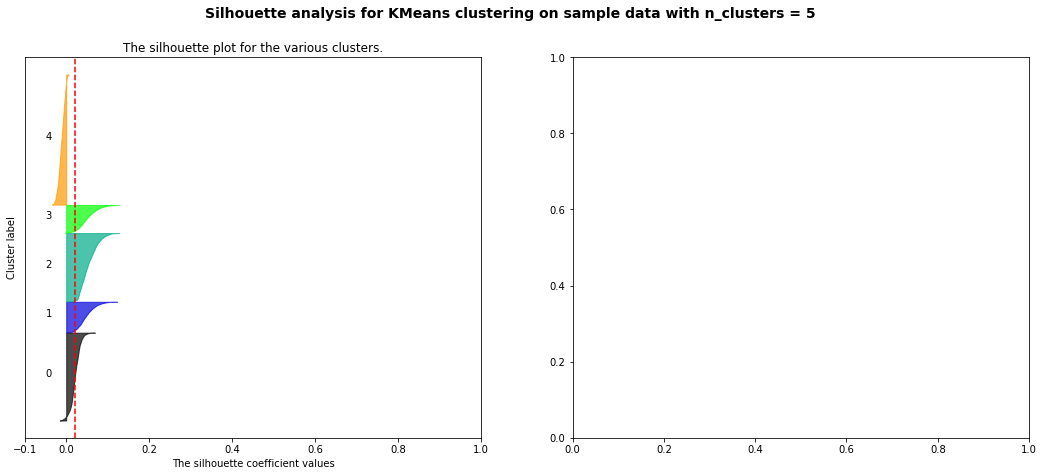

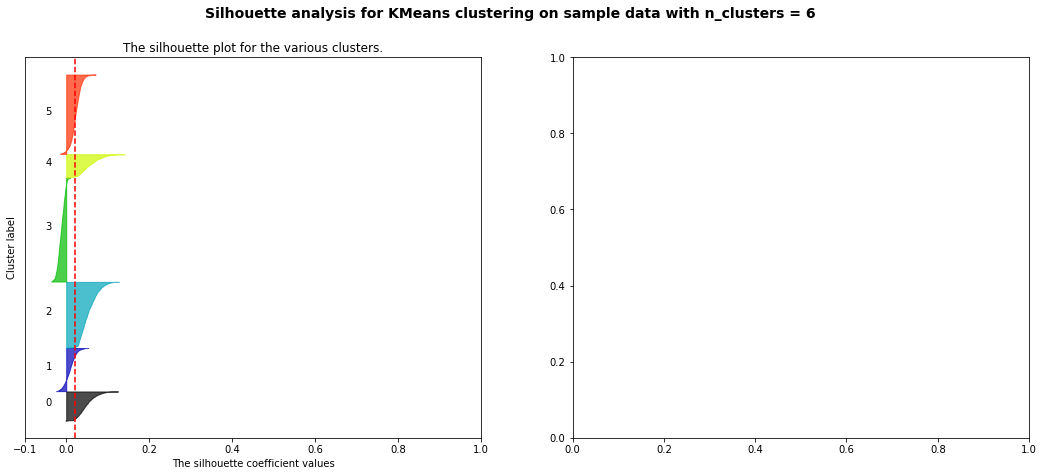

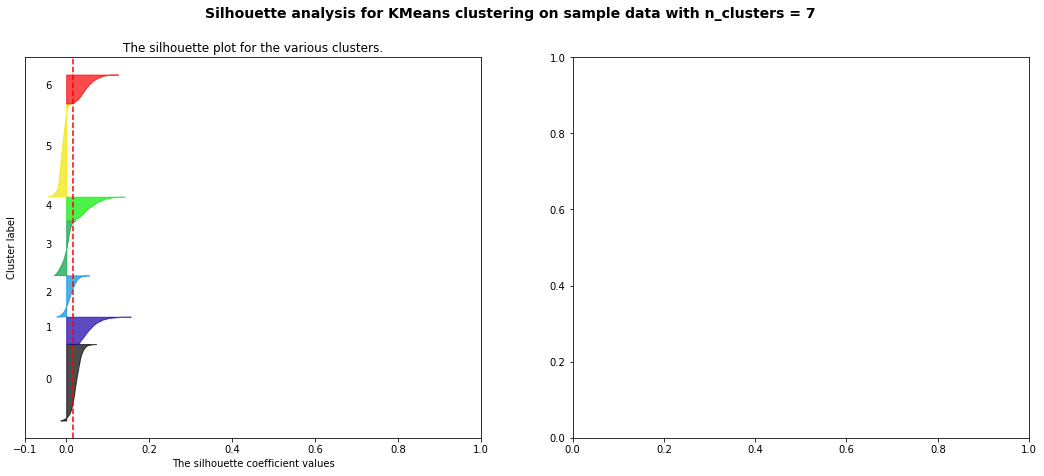

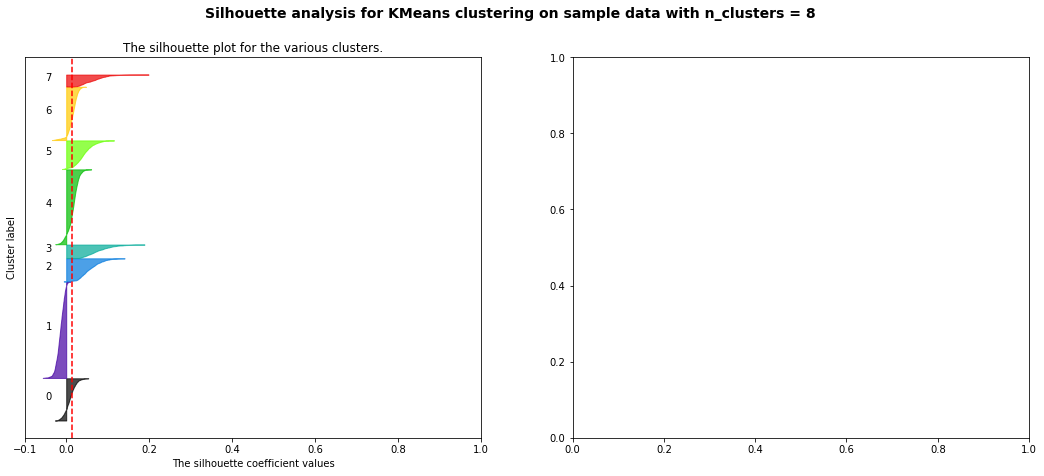

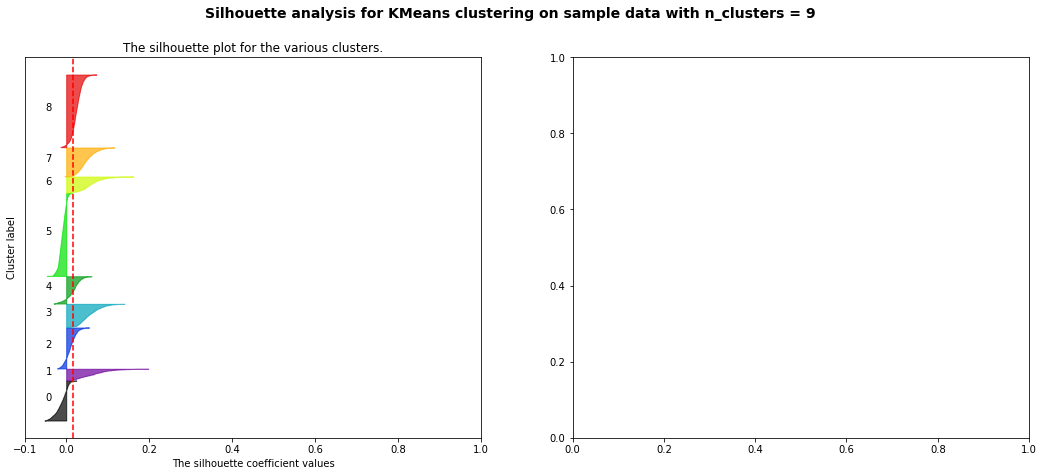

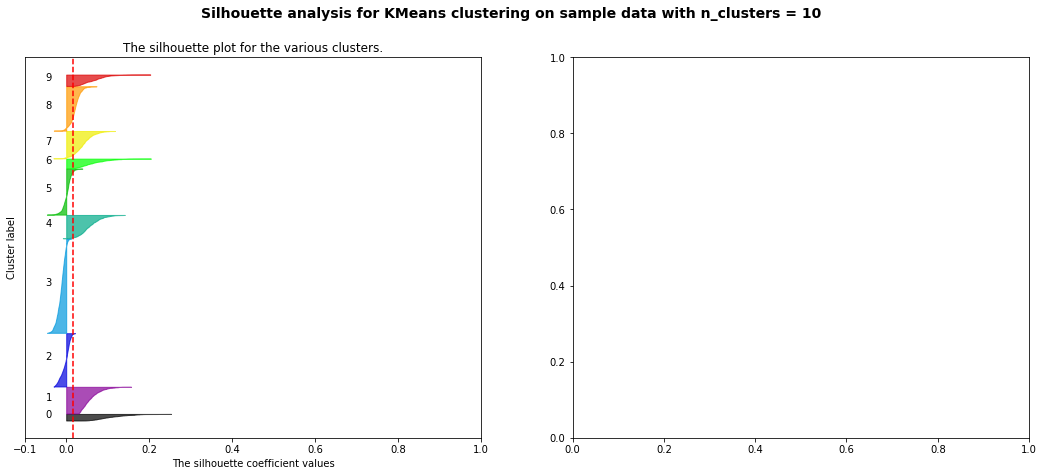

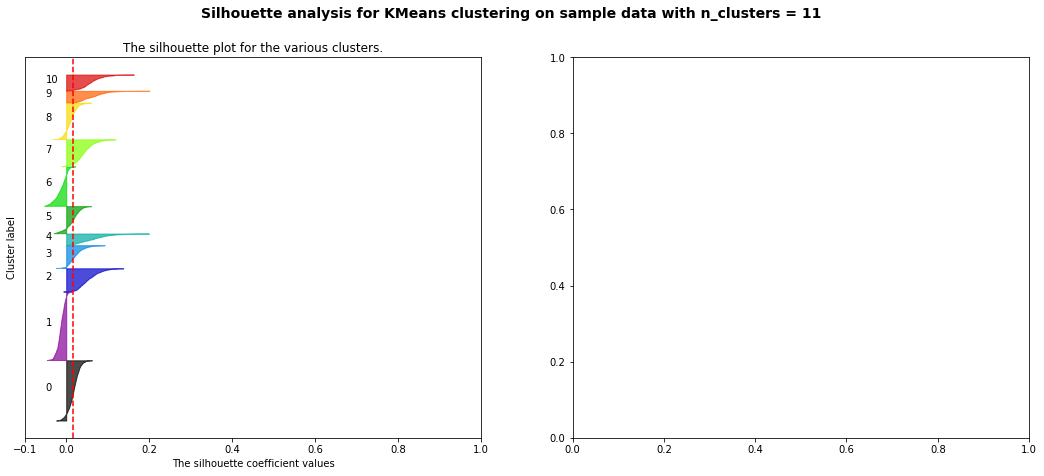

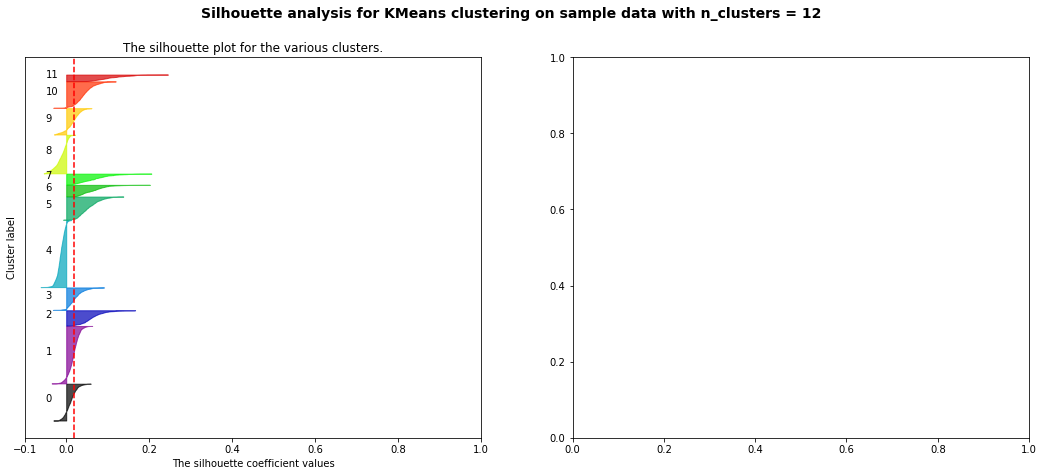

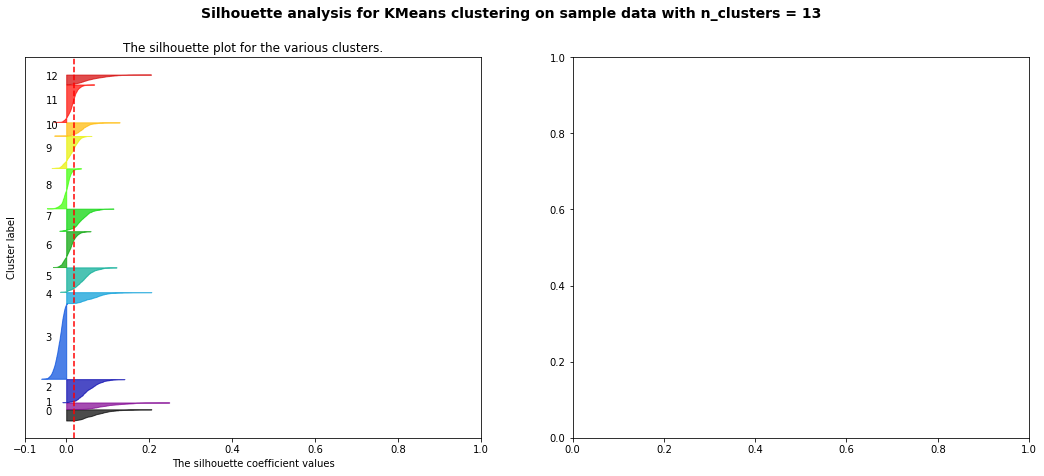

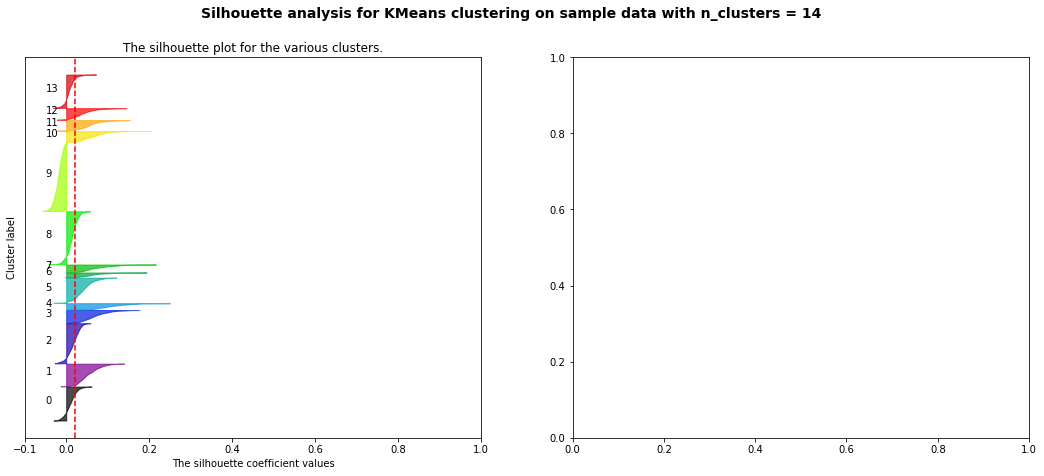

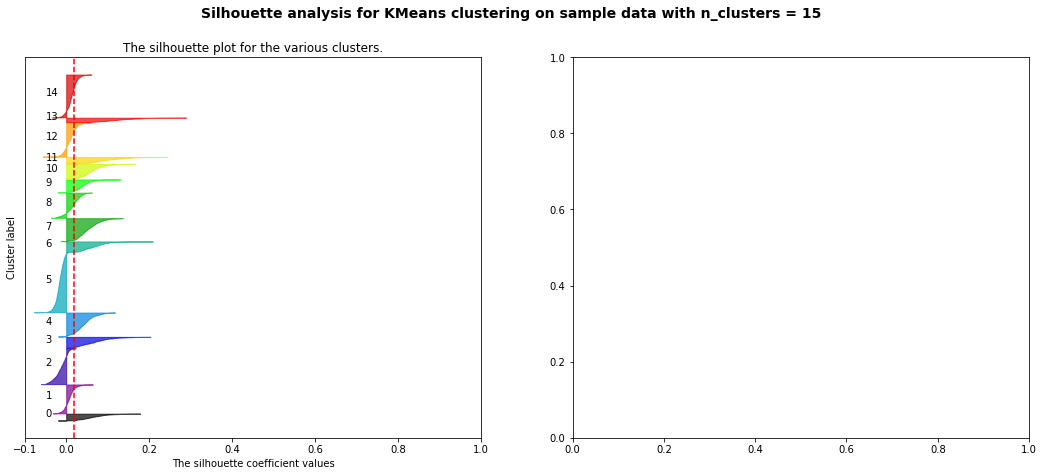

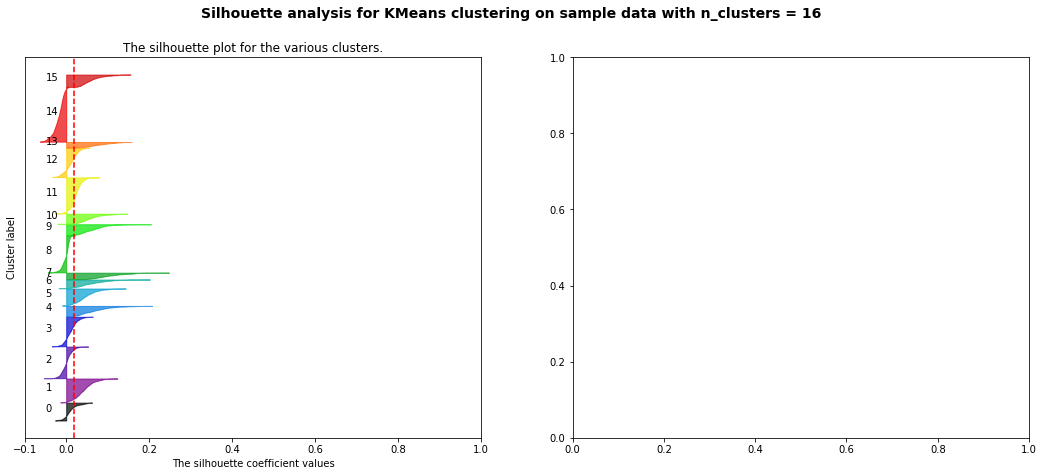

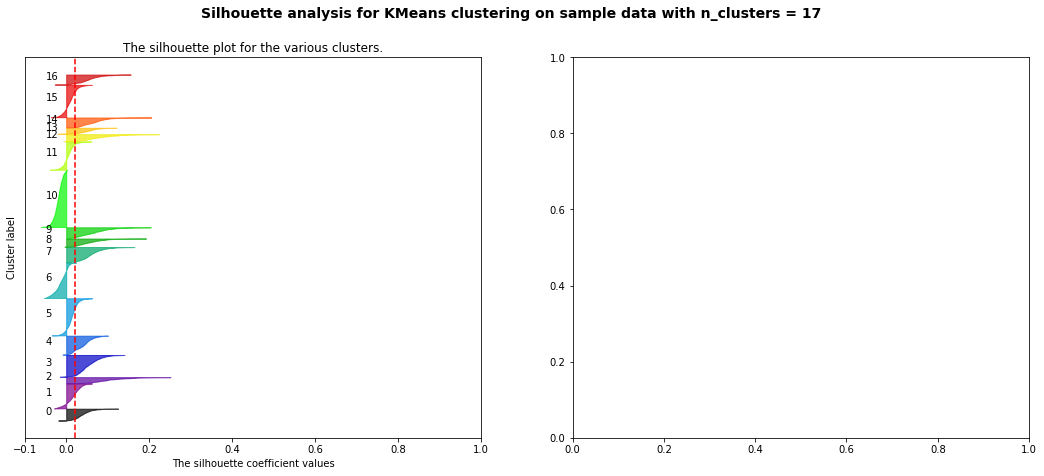

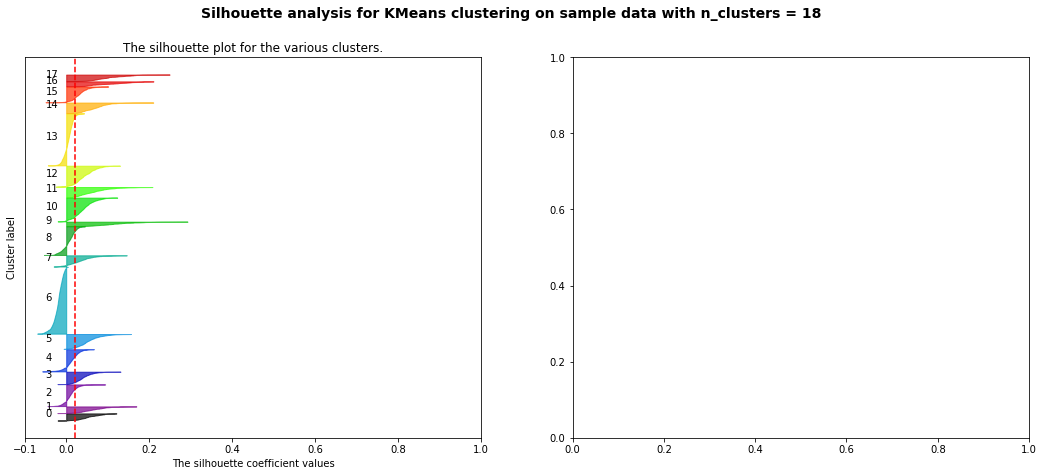

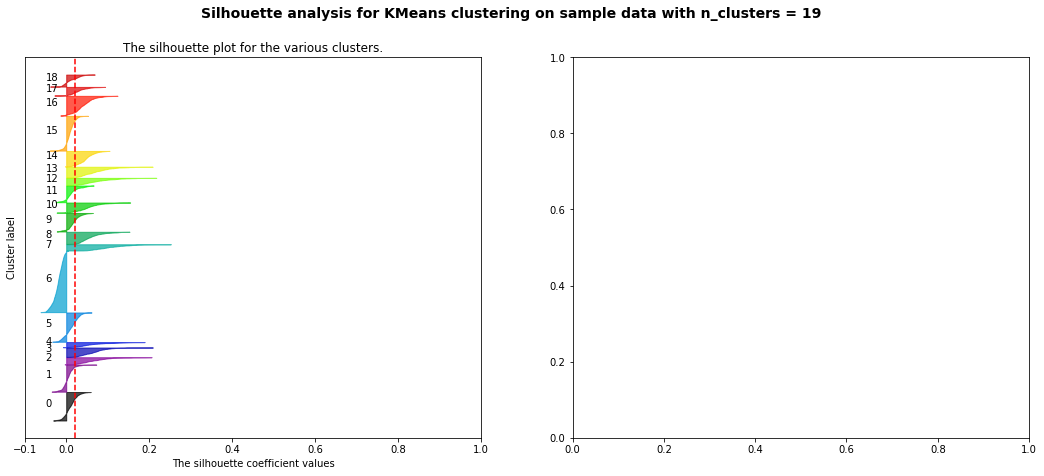

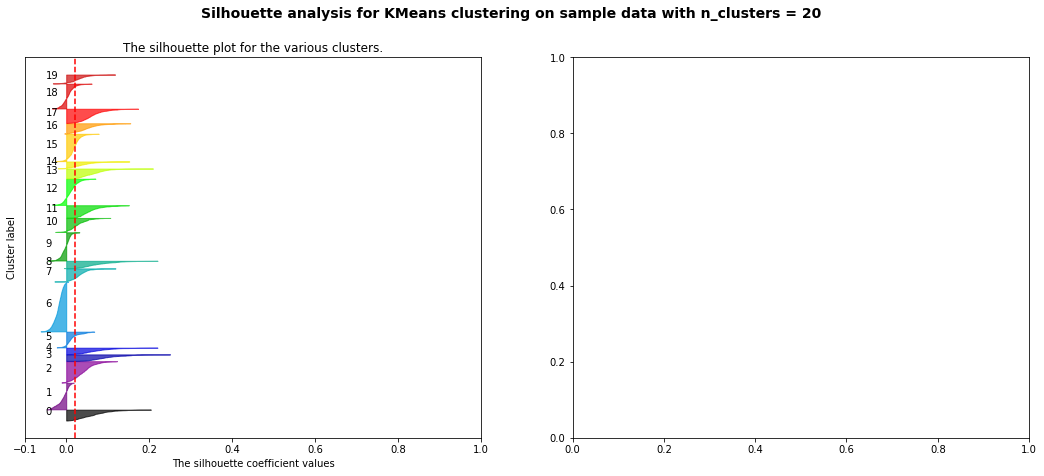

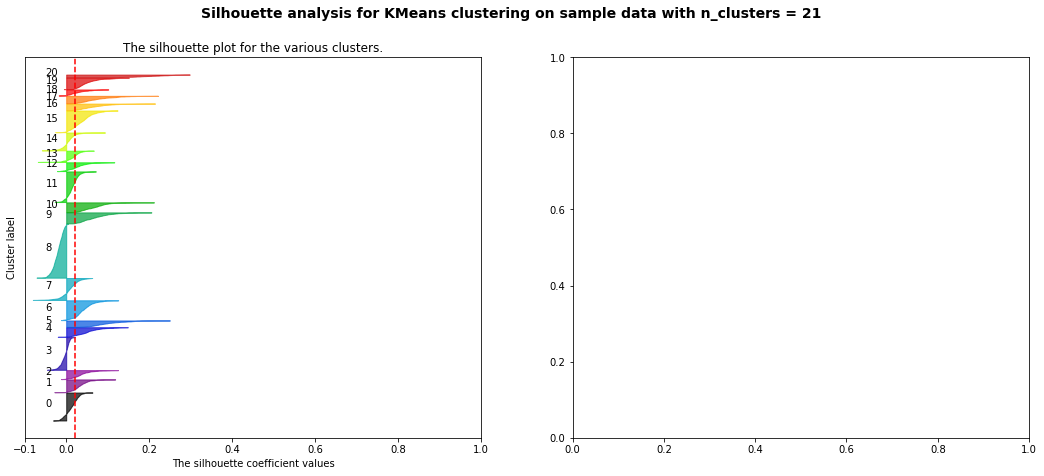

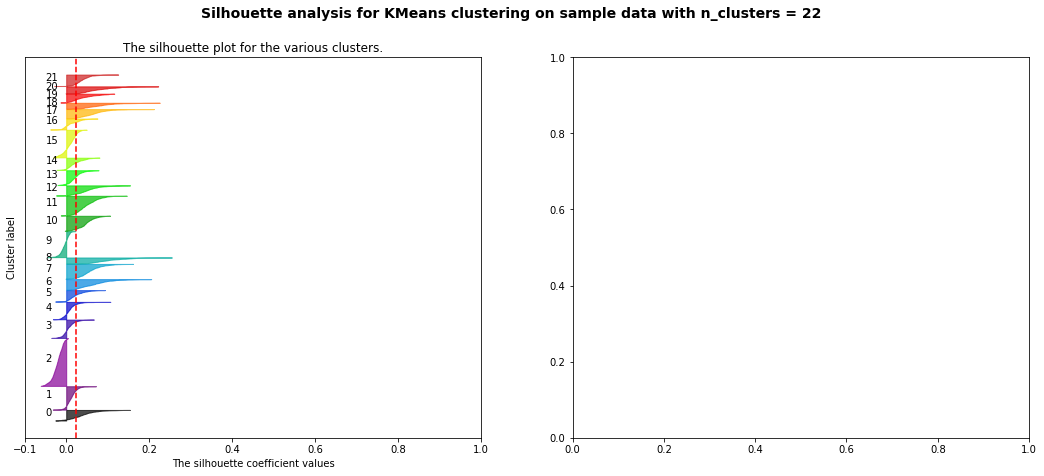

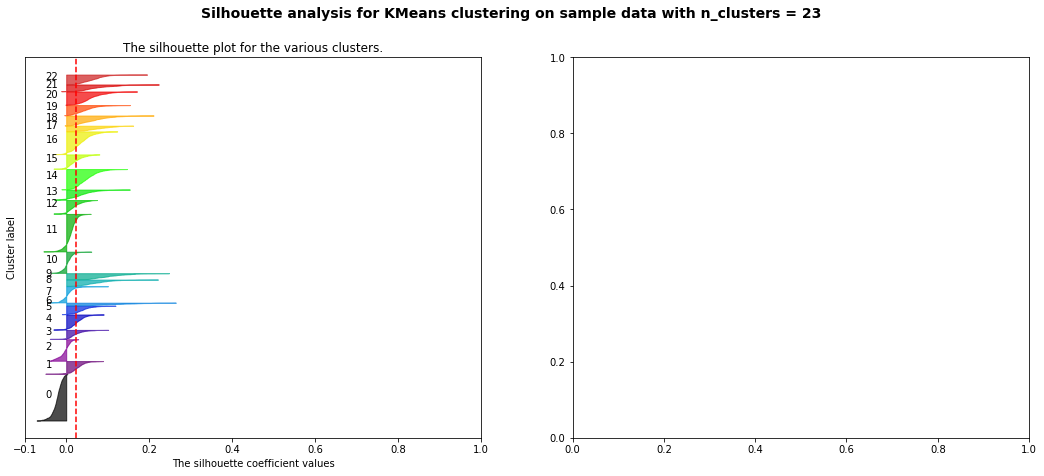

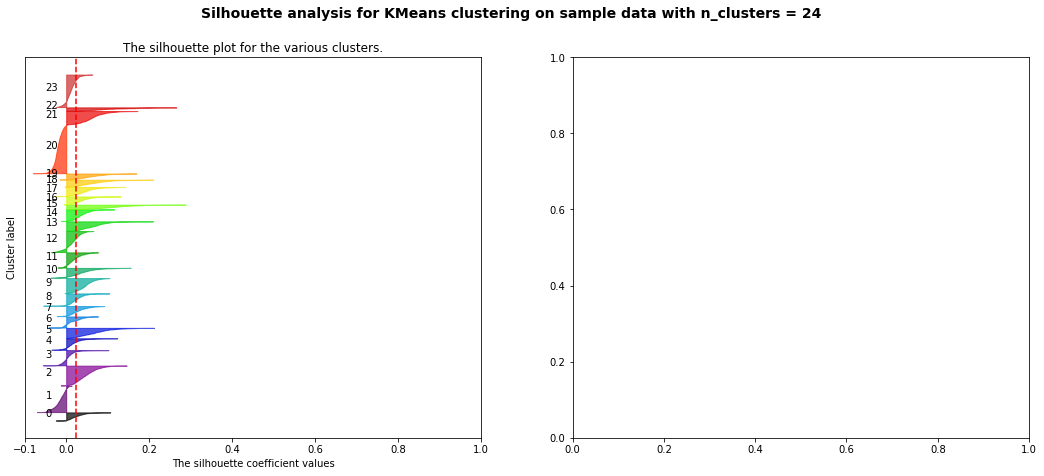

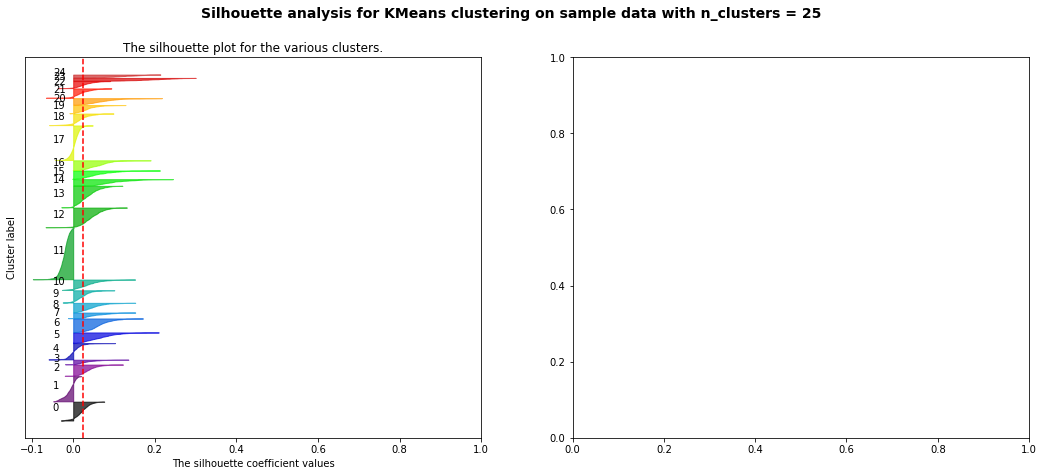

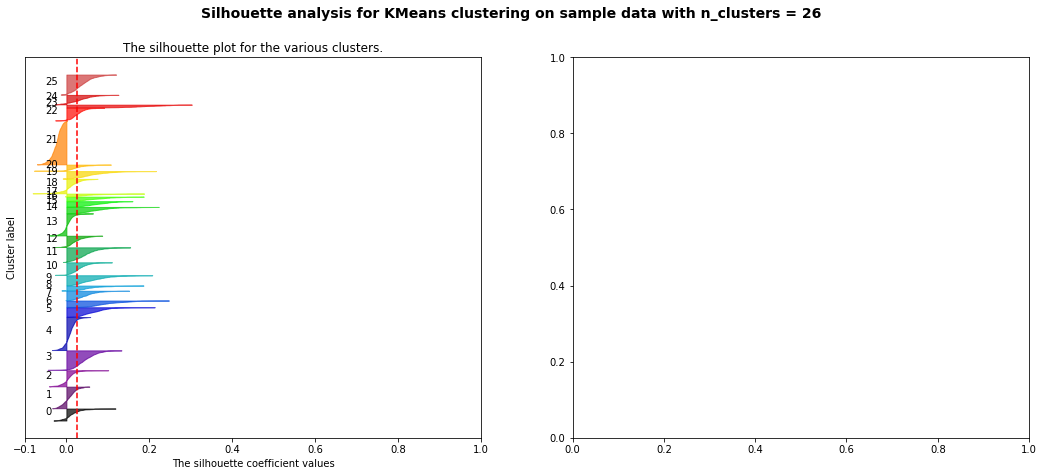

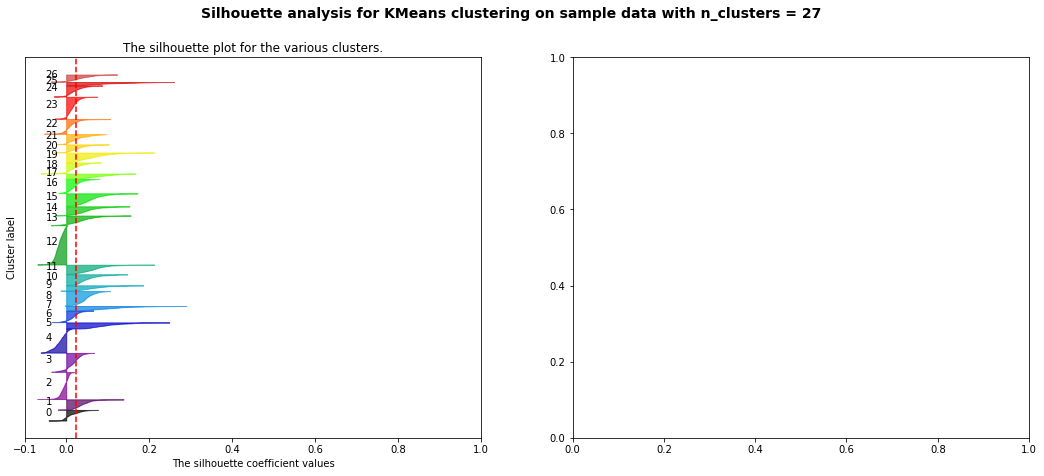

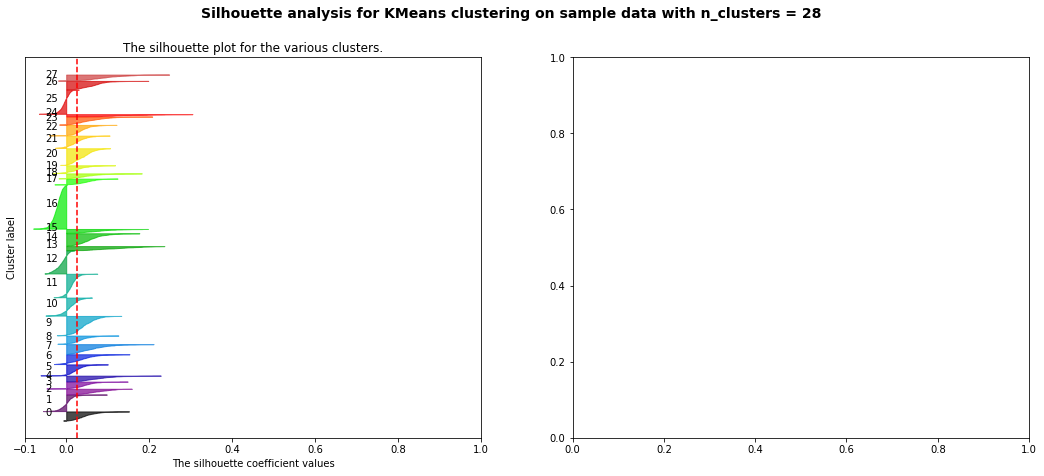

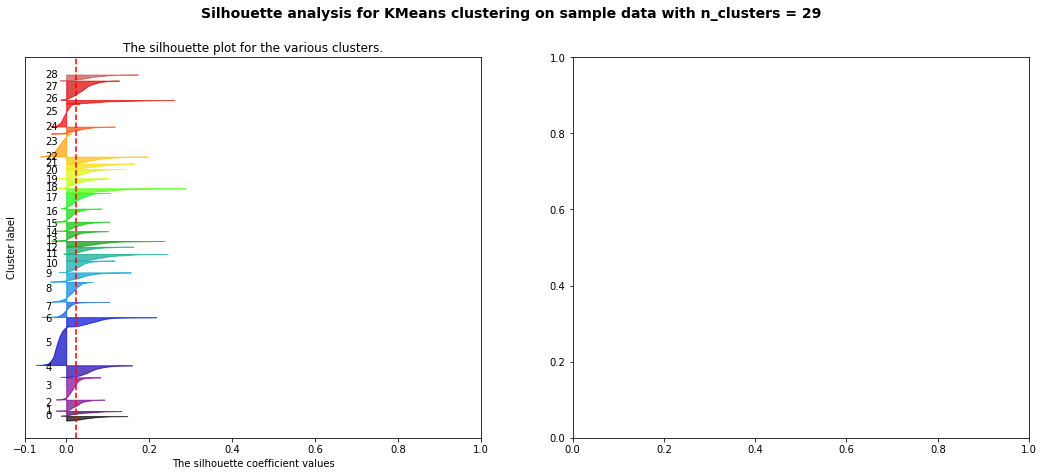

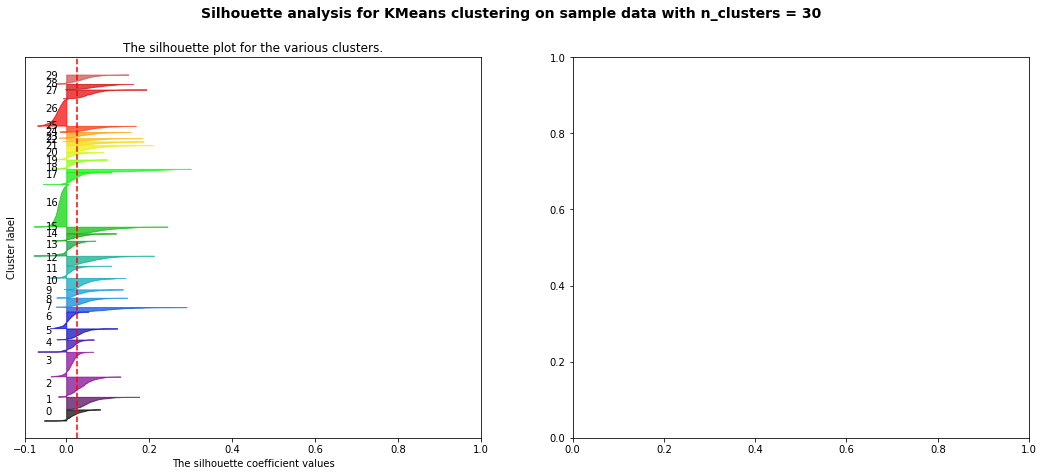

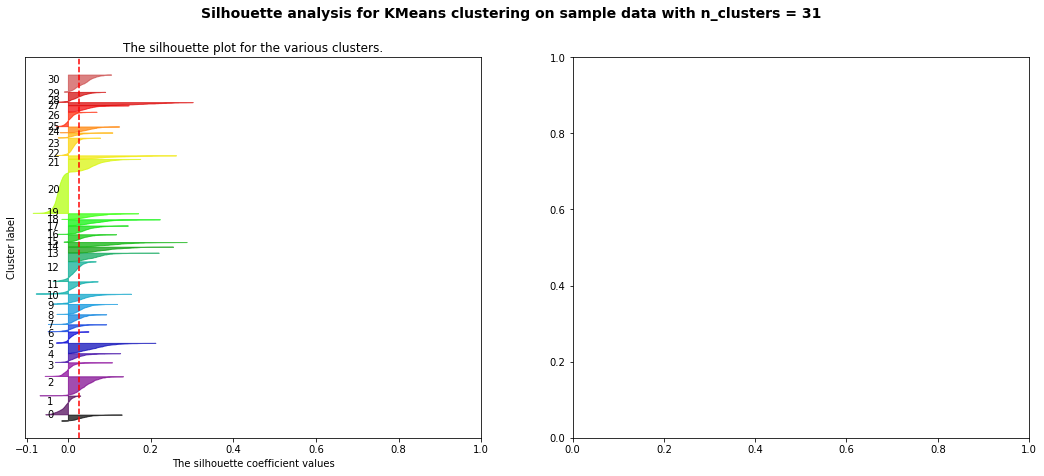

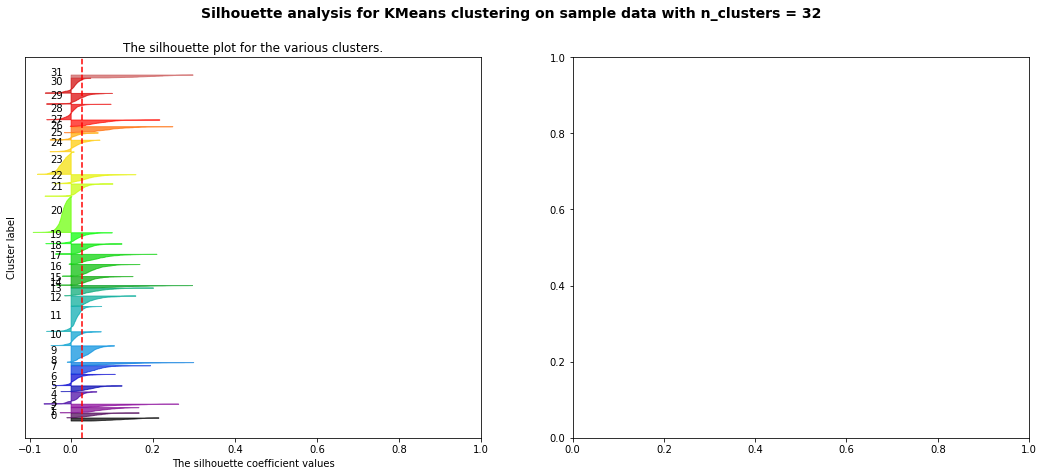

In [11]:
for i in range(2, 23):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(to_plot_tsne) + (i + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    # ax2.scatter(
    #     to_plot_tsne['x'], to_plot_tsne['y'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for k, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Silhouette analyis still pretty inconclusive...elbow method said around 5, but 5 clusters doesn't look that good in silhouette analysis

## Let's try ~~Truncated SVD~~ Optuna

In [ ]:
import optuna

In [ ]:
wcss = []
for i in range(2, 33):
    clustering = KMeans(n_clusters=i, random_state=200)
    clustering.fit(X_train)
    wcss.append(clustering.inertia_)

ks = list(range(2,33))

sns.lineplot(x = ks, y = wcss);

In [ ]:
X_train_transformed = agglo.transform(X_train)
X_train_transformed.shape

In [ ]:
wcss = []
for i in range(2, 32):
    clustering = KMeans(n_clusters=i, random_state=200)
    clustering.fit(X_train_transformed)
    wcss.append(clustering.inertia_)

ks = list(range(2,32))

sns.lineplot(x = ks, y = wcss);

This kinda looks like 8

In [ ]:
for i in range(2, 33):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(to_plot_tsne) + (i + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_transformed, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_transformed, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    # ax2.scatter(
    #     to_plot_tsne['x'], to_plot_tsne['y'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for k, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
